In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
np.random.seed(42)

In [4]:
gdp_per_capita = pd.read_csv(r"D:\Machine learning\total_ml\others\dataset\gdp.csv")
bli = pd.read_csv(r"D:\Machine learning\total_ml\others\dataset\bli.csv")

In [5]:
bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.4,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.8,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN


In [6]:
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita.drop(columns= ["Code","Year"], inplace= True)
gdp_per_capita.rename(columns = {"Entity" : "Country", "GDP per capita, PPP (constant 2017 international $)" :gdppc_col}, inplace = True)
gdp_per_capita.set_index("Country", inplace= True)

In [7]:
bli = bli[bli.INEQUALITY == "TOT"]
bli = bli.pivot_table( index = "Country", columns= "Indicator", values = "Value" )
bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,6.7,NaN,84.0,12.5,73.0,67.0,0.9,37433.0,528768.0,19.4,...,55206.0,93.0,NaN,85.0,2.7,499.0,14.36,92.0,92.0,20.0
Austria,12.2,0.8,86.0,5.3,72.0,86.0,0.5,37001.0,309637.0,20.8,...,53132.0,92.0,1.6,71.0,1.3,491.0,14.51,76.0,92.0,17.0
Belgium,12.8,0.7,80.0,4.3,65.0,56.0,1.1,34884.0,447607.0,20.0,...,54327.0,90.0,2.1,74.0,2.0,500.0,15.52,88.0,79.0,19.0
Brazil,11.7,6.7,57.0,5.6,57.0,45.0,19.0,NaN,NaN,NaN,...,NaN,83.0,NaN,NaN,2.2,400.0,NaN,80.0,70.0,16.0
Canada,7.1,0.2,92.0,3.3,70.0,78.0,1.2,34421.0,478240.0,22.9,...,55342.0,93.0,2.6,89.0,2.9,517.0,14.57,68.0,90.0,17.0


In [8]:
full_con = pd.merge(bli,gdp_per_capita, left_index= True, right_index= True)
full_con.sort_values(by = gdppc_col, inplace = True)
full_con = full_con[[gdppc_col,lifesat_col]]
full_con.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,12815.909,4.9
Colombia,13387.701,5.7
Brazil,14021.958,6.1
Mexico,18327.990,6.0
Costa Rica,19824.348,6.3


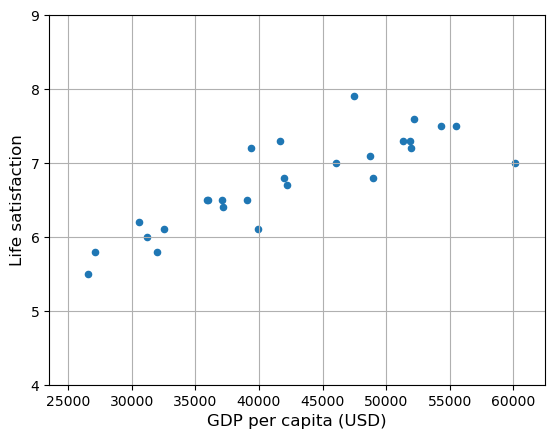

In [9]:
full_con.plot(kind = "scatter", grid = True, x = "GDP per capita (USD)", y = "Life satisfaction")
plt.axis([23_500,62_500,4,9])
plt.show()

In [10]:
x = full_con[[gdppc_col]].values
y = full_con[[lifesat_col]].values

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)
X_new = [[37_655.2]]
lr.predict(X_new)

array([[6.54044744]])

In [12]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors= 3)
model.fit(x,y)
model.predict(X_new)

array([[6.46666667]])

In [13]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_con[(full_con[gdppc_col] >= min_gdp) &
                                   (full_con[gdppc_col] <= max_gdp)]

In [14]:
country_stats.sample(5)

,GDP per capita (USD),Life satisfaction
Country,,
Slovenia,37098.120,6.5
New Zealand,41642.027,7.3
Lithuania,37166.410,6.4
Germany,51840.330,7.3
Russia,26583.797,5.5


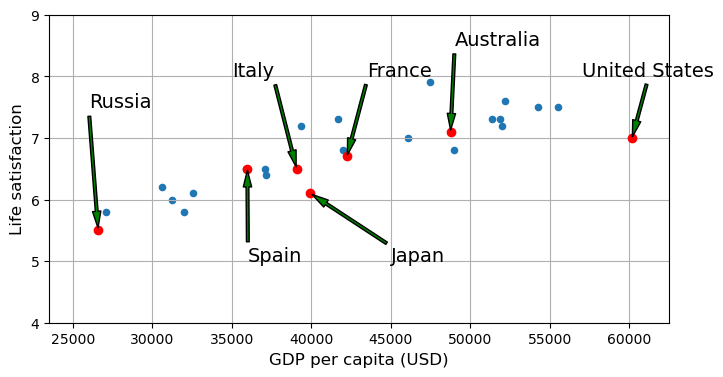

In [15]:
country_stats.plot(kind = "scatter", x = gdppc_col, y = lifesat_col, grid = True, figsize = (8,4))

min_life_sat = 4
max_life_sat = 9

country_pos = {
    "Russia" : (26_000,7.5),
    "Spain" : (36_000,5),
    "Italy" : (35_000,8),
    "Japan" : (45_000,5),
    "France" : (43_500,8),
    "United States" : (57_000,8),
    "Australia" : (49_000,8.5)
}

for country, pos_text in country_pos.items():
    pos_x = country_stats[[gdppc_col]].loc[country]
    pos_y = country_stats[[lifesat_col]].loc[country]
    
    plt.annotate(country, xy = (pos_x, pos_y), xytext= pos_text, fontsize = 14,
                arrowprops= dict(facecolor = "green", width = 2, headwidth = 6, shrink = .02))
    
    plt.plot(pos_x,pos_y, "ro")

plt.axis([min_gdp,max_gdp, min_life_sat, max_life_sat])
plt.show()

In [16]:
highlighted_country = country_stats.loc[list(country_pos.keys())]
highlighted_country[[gdppc_col,lifesat_col]].sort_values(by = gdppc_col)

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26583.797,5.5
Spain,35967.890,6.5
Italy,39065.280,6.5
Japan,39935.465,6.1
France,42233.140,6.7
Australia,48747.850,7.1
United States,60167.855,7.0


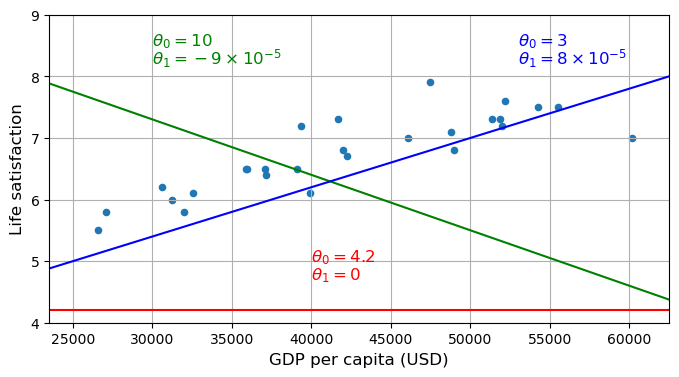

In [17]:
country_stats.plot(kind = "scatter", x = gdppc_col, y = lifesat_col, grid = True, figsize = (8,4))

X = np.linspace(min_gdp, max_gdp, 1000)

b, m = 4.2,0
plt.plot(X, b + m * 1e-5 * X, "r")
plt.text(40_000,5, fr"$\theta_0 = {b}$", color = "r")
plt.text(40_000,4.7, fr"$\theta_1 = {m}$", color = "r")

b,m = 10,-9
plt.plot(X, b + m * 1e-5 * X, "g")
plt.text(30_000,8.5, fr"$\theta_0 = {b}$", color = "g")
plt.text(30_000,8.2, fr"$\theta_1 = {m} \times 10^{{-5}}$", color = "g")

b,m = 3,8
plt.plot(X, b + m * 1e-5 * X, "b")
plt.text(53_000,8.5, fr"$\theta_0 = {b}$", color = "b")
plt.text(53_000,8.2, fr"$\theta_1 = {m} \times10^{{-5}}$", color = "b")

plt.axis([min_gdp,max_gdp,min_life_sat,max_life_sat])
plt.show()

In [18]:
x_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

lr = LinearRegression()
lr.fit(x_sample,y_sample)

t0,t1  = lr.intercept_[0],lr.coef_[0][0]
print(f"theta_0 = {t0:.2f}, theta_1 = {t1:.2e}") # fr"$\theta_0 = {b}$"

theta_0 = 4.33, theta_1 = 5.73e-05


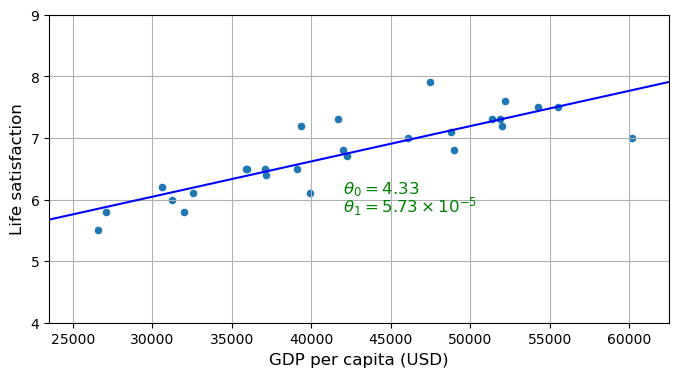

In [19]:
country_stats.plot(kind = "scatter", x = gdppc_col, y = lifesat_col, grid = True, figsize = (8,4))

X = np.linspace(min_gdp, max_gdp, 1000)

plt.plot(X, t0 + t1 * X,"b")
plt.text(42_000,6.1, fr"$\theta_0 = {t0:.2f}$", color = "green")
plt.text(42_000,5.8, fr"$\theta_1 = {t1 * 1e5: .2f} \times 10^{{-5}}$", color = "green")
plt.axis([min_gdp,max_gdp,min_life_sat,max_life_sat])
plt.show()

In [20]:
russia_gdp_per_capita = country_stats[gdppc_col].loc["Russia"]
russia_lifestate_predicted = lr.predict([[russia_gdp_per_capita]])[0][0]

japan_gdp_per_capita = country_stats[gdppc_col].loc["Japan"]
japan_lifestate_predicted = lr.predict([[japan_gdp_per_capita]])[0][0]

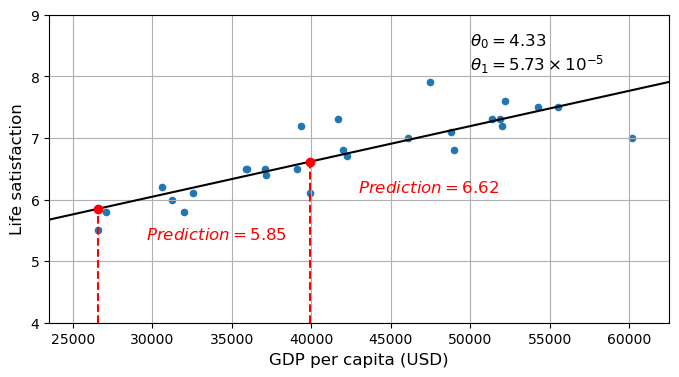

In [21]:
country_stats.plot(kind = "scatter", x = gdppc_col, y = lifesat_col,grid = True, figsize = (8,4))

X = np.linspace(min_gdp,max_gdp,100)
plt.plot(X, t0 + t1 * X, color = "black")

plt.text(50_000,8.5, fr"$\theta_0 = {t0:.2f}$", color = "black")
plt.text(50_000,8.1, fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color = "black")

plt.plot([russia_gdp_per_capita,russia_gdp_per_capita],[min_life_sat,russia_lifestate_predicted], "r--")
plt.plot(russia_gdp_per_capita,russia_lifestate_predicted,"ro")
plt.text(russia_gdp_per_capita + 3000,russia_lifestate_predicted - .5, 
         fr"$Prediction = {russia_lifestate_predicted: .2f}$", color = "red")

plt.plot([japan_gdp_per_capita,japan_gdp_per_capita],[min_life_sat,japan_lifestate_predicted], "r--")
plt.text(japan_gdp_per_capita + 3000,japan_lifestate_predicted - .5, 
         fr"$Prediction = {japan_lifestate_predicted: .2f}$", color = "red")
plt.plot(japan_gdp_per_capita,japan_lifestate_predicted,"ro")
plt.axis([min_gdp,max_gdp,min_life_sat,max_life_sat])
plt.show()

In [22]:
full_con.shape

(37, 2)

In [23]:
missing_data = full_con[(full_con[gdppc_col] < min_gdp) | (full_con[gdppc_col] > max_gdp)]
missing_data

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,12815.909,4.9
Colombia,13387.701,5.7
Brazil,14021.958,6.1
Mexico,18327.990,6.0
Costa Rica,19824.348,6.3
Chile,23017.690,6.2
Norway,63548.000,7.3
Switzerland,68670.240,7.5
Ireland,91099.750,7.0


In [24]:
missing_con_pos = {
    "South Africa" : (30_000,4.2),
    "Colombia" : (20_000,8),
    "Brazil" : (2_000,7),
    "Mexico" : (19_000,5),
    "Costa Rica" : (35_000,5),
    "Chile" : (29_000,7.5),
    "Norway" : (62_000,6),
    "Switzerland" : (80_000,8),
    "Ireland" : (90_000,6),
    "Luxembourg" : (90_000,5.5),
}

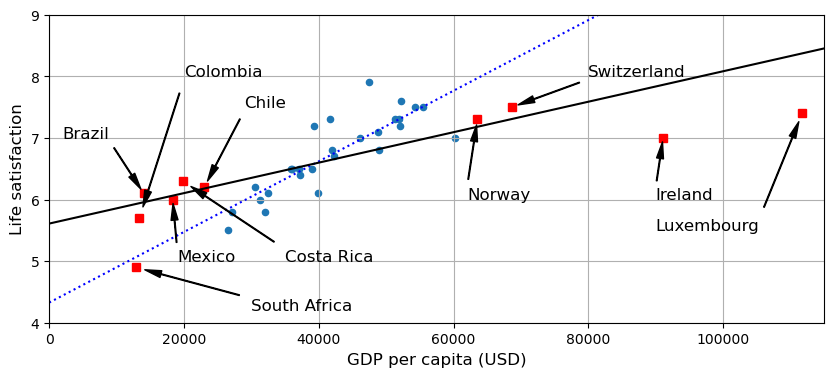

In [25]:
full_con.plot(kind = "scatter", x = gdppc_col, y = lifesat_col, figsize = (10,4), grid = True)

for country,pos_text in missing_con_pos.items():
    
    x_pos,y_pos = missing_data.loc[country]
    plt.annotate(country, xy= (x_pos,y_pos), xytext = pos_text,fontsize = 12,
                arrowprops= dict(facecolor = "black", width = .5, shrink = .08, headwidth = 5))
    plt.plot(x_pos,y_pos, "rs")
    
X = np.linspace(0,115_000,1000)
plt.plot(X, t0 + t1*X, "b:")

lin_reg_full = LinearRegression()
xfull = np.c_[full_con[gdppc_col]]
yfull = np.c_[full_con[lifesat_col]]
lin_reg_full.fit(xfull,yfull)

t0full,t1full = lin_reg_full.intercept_[0],lin_reg_full.coef_[0][0]
plt.plot(X, t0full + t1full * X, "k")

plt.axis([0,115_000, min_life_sat,max_life_sat])
plt.show()

In [26]:
from sklearn import pipeline
from sklearn import preprocessing

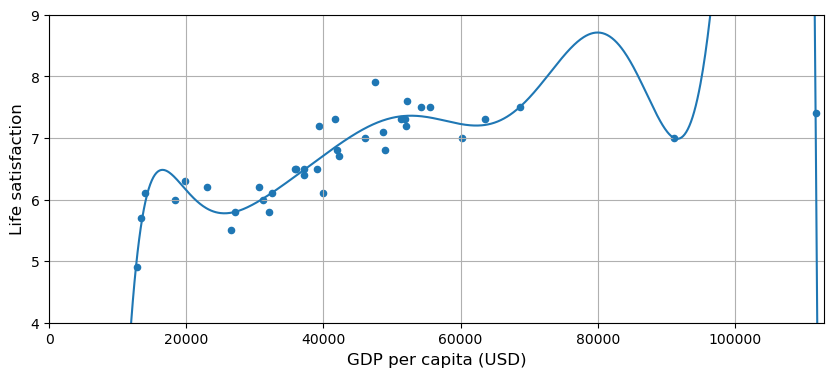

In [27]:
full_con.plot(kind = "scatter", x = gdppc_col, y = lifesat_col, grid = True, figsize = (10,4))
poly = preprocessing.PolynomialFeatures(degree=10, include_bias= False)
scalor = preprocessing.StandardScaler()
lin_reg2 = LinearRegression()

pipeline_reg = pipeline.Pipeline([
    ("poly", poly),
    ("scal", scalor),
    ("lin",lin_reg2)
])
pipeline_reg.fit(xfull,yfull)
curve = pipeline_reg.predict(X[:,np.newaxis])
plt.plot(X,curve)

plt.axis([0,113_000, min_life_sat,max_life_sat])
plt.show()